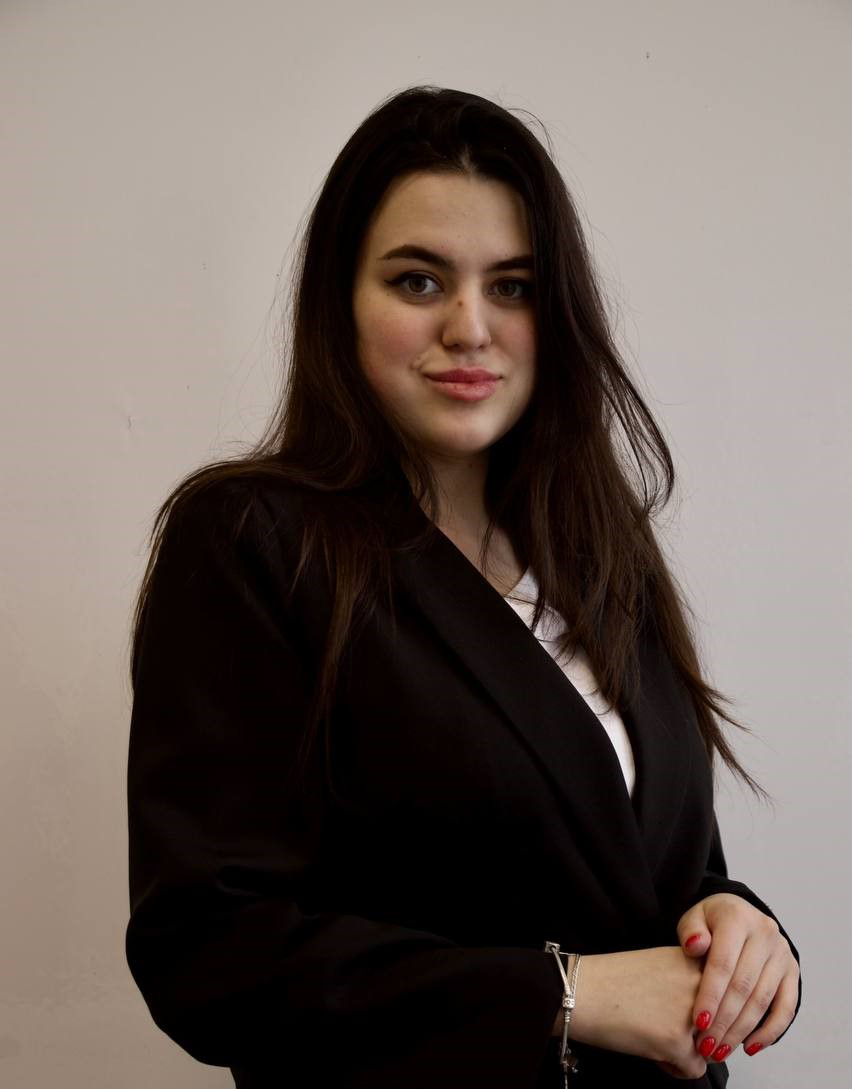

In [6]:
import numpy as np 
from PIL import Image

# Преобразование из PIL в Numpy Array 
img = Image.open('me_before.jpg') 
x = np.array(img) 
img

In [2]:
# Создание функции для сжатия картинки 
def reduce_rank(U, S, Vt, r): 
    y_r = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :] 
    y_r[y_r > 255] = 255 
    y_r[y_r < 0] = 0 
    img_y_r = np.asarray(y_r, dtype=np.uint8) 
    return img_y_r 

In [4]:
r_values = [1, 2, 10, 30, 100] 
for r in r_values: 
  U, S, Vt = np.linalg.svd(x[:, :, 0], full_matrices=False) 
  img_y_red = reduce_rank(U, S, Vt, r) 
 
  U, S, Vt = np.linalg.svd(x[:, :, 1], full_matrices=False) 
  img_y_green = reduce_rank(U, S, Vt, r) 
 
  U, S, Vt = np.linalg.svd(x[:, :, 2], full_matrices=False) 
  img_y_blue = reduce_rank(U, S, Vt, r) 
 
  y = np.concatenate( 
    (img_y_red[:, :, np.newaxis], img_y_green[:, :, np.newaxis], img_y_blue[:, :, np.newaxis]), axis=2) 
 
  Image.fromarray(y).save(f'{r}me_after.jpg')

Первоначальный размер файла:90кб, при сингулярном значении равном 1:30кб, 2:32кб, 10:42кб, 100:56кб

Ниже будет фото при сингулярном значении раном 10, остальные фото можно посмотреть во вложениях

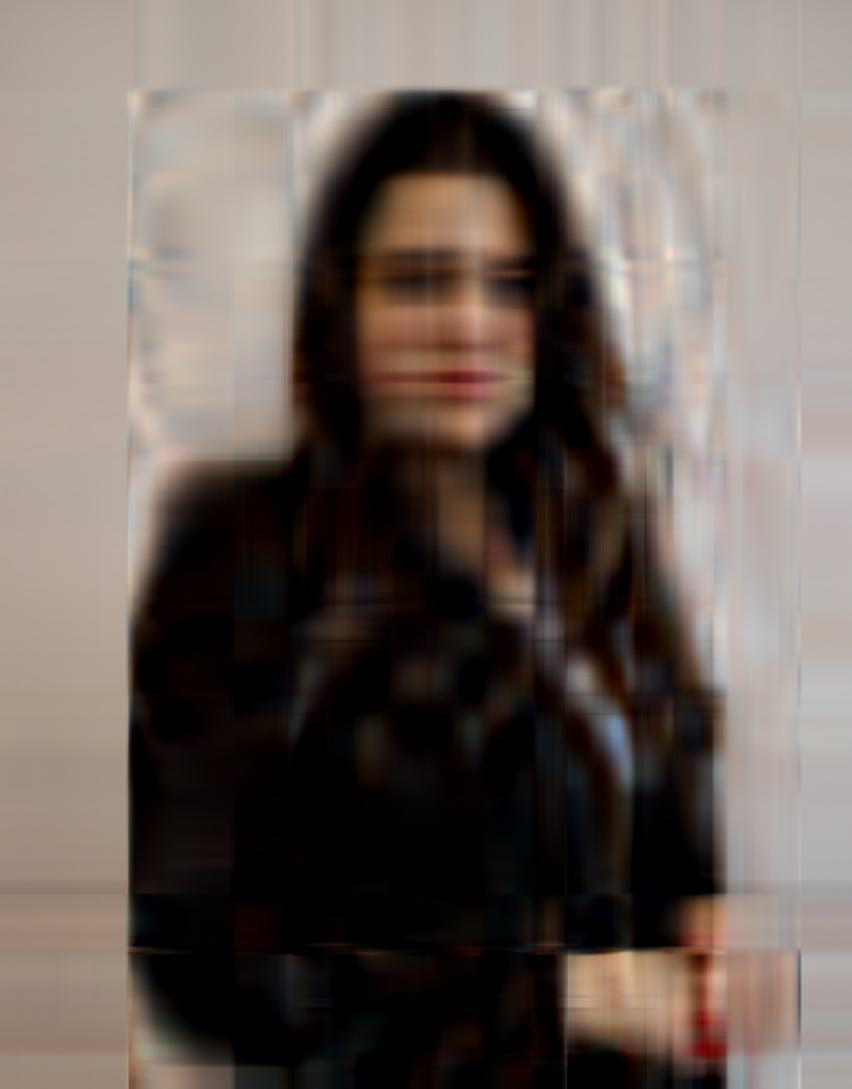

In [12]:
img_ = Image.open('10me_after.jpg')
img_